In [1]:
import pandas as pd

main_dir = 'C:\\Users\\Georgios\\Downloads\\clustering4ccerRevision\\journal\\new\\'
df = pd.read_excel(main_dir + 'schemaBasedEmbeddingsAnalysisClean.xlsx')
df

,Dataset,Attribute Name,Embeddings,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Coverage D1,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,Name,FastText,Cosine Similarity,Scarce,339387,Restaurants,11,2,0.67,...,0.921348,0.803922,0.65,18,0.795455,0.786517,0.790960,0.95,26,Right
1,Restaurants,Name,FastText,Euclidean Distance,Scarce,339678,Restaurants,11,2,0.67,...,0.887640,0.818653,0.30,18,0.802198,0.820225,0.811111,0.40,6,Right
2,Restaurants,Name,FastText,WMD,Scarce,339678,Restaurants,11,2,0.67,...,0.775281,0.644860,0.95,88,0.305310,0.775281,0.438095,0.95,78,Right
3,Restaurants,Name,Albert,Cosine Similarity,Scarce,268054,Restaurants,11,2,0.67,...,0.775281,0.704082,0.95,140,0.526718,0.775281,0.627273,0.95,67,Right
4,Restaurants,Name,Albert,Euclidean Distance,Scarce,339678,Restaurants,11,2,0.67,...,0.752809,0.779070,0.95,17,0.807229,0.752809,0.779070,0.95,6,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,DBLP-Scholar,Title,Albert,Cosine Similarity,One-sided,153738496,Bibliographic,56,8,1.00,...,0.694974,0.710678,0.95,9589,0.686567,0.697574,0.692027,0.95,2489,Right
66,DBLP-Scholar,Title,Albert,Euclidean Distance,One-sided,154364148,Bibliographic,56,8,1.00,...,0.653813,0.783286,0.15,7597,0.953135,0.652080,0.774376,0.15,1719,Right
67,DBLP-Scholar,Title,Albert,WMD,One-sided,154364148,Bibliographic,56,8,1.00,...,0.639081,0.690382,0.95,7541,0.729743,0.639948,0.681902,0.95,1729,Right
68,Movies,Title,FastText,Cosine Similarity,Balanced,378388014,Movies,18,3,1.00,...,0.463106,0.604407,0.60,35312,0.751234,0.485807,0.590045,0.65,8842,Right


In [2]:
thresholds = pd.DataFrame()
thresholds['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Threshold')):
            thresholds[column] = df[column]
            
thresholds.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
thresholds.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,70.000,69.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,0.688,0.803,0.769,0.662,0.779,0.772,0.746,0.756
std,0.361,0.240,0.266,0.303,0.268,0.263,0.294,0.282
min,0.000,0.150,0.100,0.050,0.100,0.100,0.050,0.100
25%,0.475,0.700,0.550,0.412,0.562,0.562,0.512,0.512
50%,0.950,0.950,0.950,0.800,0.950,0.950,0.950,0.925
75%,0.950,0.950,0.950,0.950,0.950,0.950,0.950,0.950
max,0.950,0.950,0.950,0.950,0.950,0.950,0.950,0.950


In [4]:
corr = thresholds.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,1.00,0.40,0.48,0.20,0.37,0.36,0.28,0.33
RSR,0.40,1.00,0.88,0.50,0.90,0.87,0.82,0.82
RCA,0.48,0.88,1.00,0.50,0.92,0.89,0.84,0.85
BAH,0.20,0.50,0.50,1.00,0.49,0.42,0.49,0.51
BMC,0.37,0.90,0.92,0.49,1.00,0.95,0.91,0.93
EXC,0.36,0.87,0.89,0.42,0.95,1.00,0.89,0.88
KRC,0.28,0.82,0.84,0.49,0.91,0.89,1.00,0.98
UMC,0.33,0.82,0.85,0.51,0.93,0.88,0.98,1.00


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

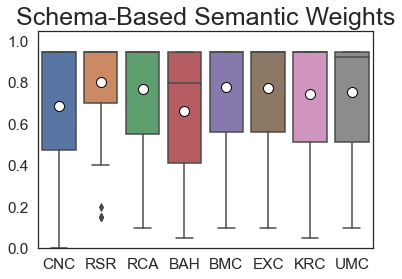

In [6]:
ax = sns.boxplot(data = thresholds,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
ax.set(ylim=(0.0, 1.05))
ax.set_title("Schema-Based Semantic Weights", fontsize = 25)
plt.savefig(main_dir + 'sbseThr.eps', format='eps')

In [6]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

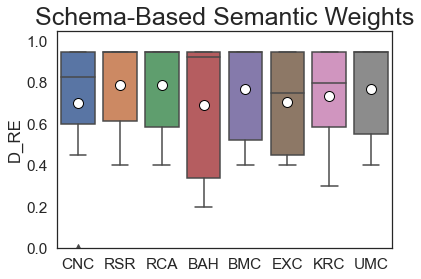

In [7]:
dataset_df = thresholds[thresholds['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_RE')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Based Semantic Weights", fontsize = 25)
plt.savefig(main_dir + 'sbseD1.eps', format='eps')

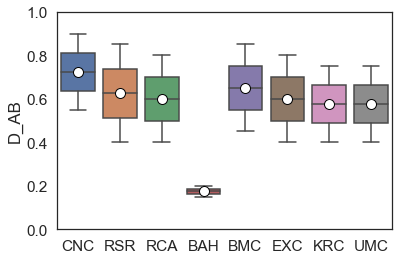

In [9]:
dataset_df = thresholds[thresholds['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AB')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD2.eps', format='eps')

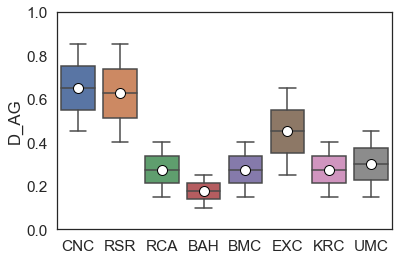

In [10]:
dataset_df = thresholds[thresholds['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AG')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD3.eps', format='eps')

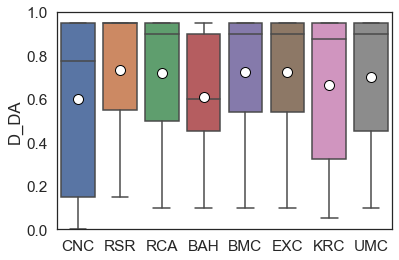

In [11]:
dataset_df = thresholds[thresholds['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DA')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD4.eps', format='eps')

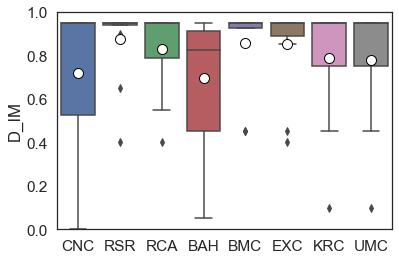

In [12]:
dataset_df = thresholds[thresholds['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IM')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD5.eps', format='eps')

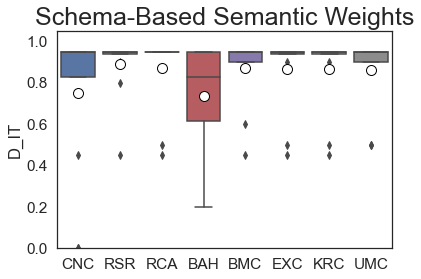

In [8]:
dataset_df = thresholds[thresholds['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IT')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Based Semantic Weights", fontsize = 25)
plt.savefig(main_dir + 'sbseD6.eps', format='eps')

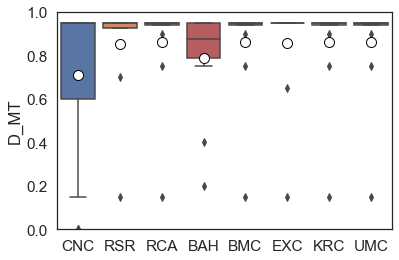

In [14]:
dataset_df = thresholds[thresholds['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_MT')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD7.eps', format='eps')

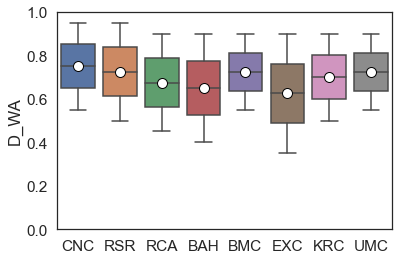

In [15]:
dataset_df = thresholds[thresholds['Dataset']==datasets[7]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_WA')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD8.eps', format='eps')

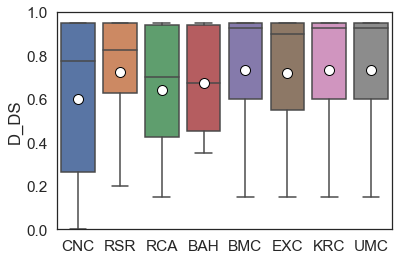

In [16]:
dataset_df = thresholds[thresholds['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DS')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD9.eps', format='eps')

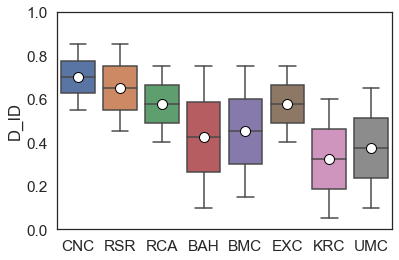

In [17]:
dataset_df = thresholds[thresholds['Dataset']==datasets[9]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_ID')
p.set(ylim=(0.0, 1.0))
plt.savefig(main_dir + 'sbseD10.eps', format='eps')